In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [168]:
def f(x):
    return np.abs(x - 3) * (x ** 2 + 1)


x_min, x_max = 0, 4

In [169]:
x_list = np.arange(x_min, x_max, 0.3)
y_list = f(x_list)

In [186]:
k = 3
x_list_extended = []
for i in range(len(x_list) - 1):
    d = x_list[i + 1] - x_list[i]
    delta = d / k
    for j in range(k):
        x_list_extended.append(x_list[i] + delta * j)
x_list_extended.append(x_list[-1])
x_list_extended = np.array(x_list_extended)

In [171]:
def get_linear_interp(x1, x2, y1, y2, xp):
    if x1 <= xp <= x2:
        yp = y1 + ((y2 - y1) / (x2 - x1)) * (xp - x1)
        return yp
    else:
        assert False  # @todo переделать


def get_linear_interp_all(x_list, y_list):
    x_list_linear = []
    y_list_linear = []
    for i in range(len(x_list) - 1):
        d = x_list[i + 1] - x_list[i]
        delta = d / k
        for j in range(k):
            x = x_list[i] + j * delta
            y = get_linear_interp(x_list[i], x_list[i + 1], y_list[i], y_list[i + 1], x)

            x_list_linear.append(x)
            y_list_linear.append(y)

    x_list_linear.append(x_list[-1])
    y_list_linear.append(y_list[-1])
    return x_list_linear, y_list_linear

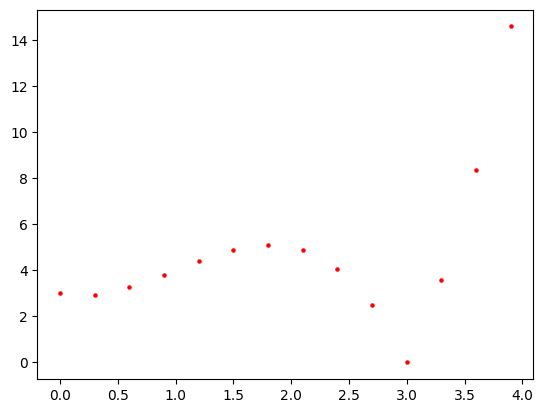

In [172]:
plt.scatter(x_list, y_list, s=5, c='r', zorder=2)

In [173]:
x_list_linear, y_list_linear = get_linear_interp_all(x_list, y_list)

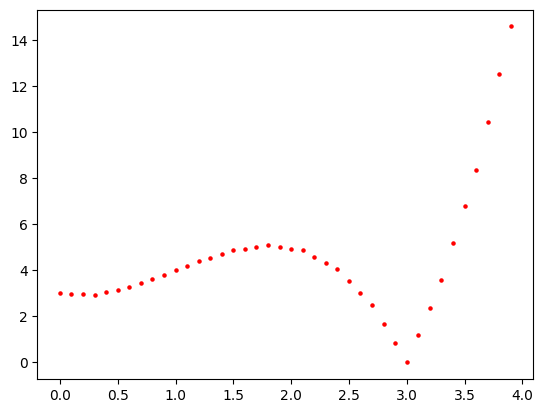

In [174]:
plt.scatter(x_list_linear, y_list_linear, s=5, c='r', zorder=2)

In [175]:
from functools import cache, lru_cache


@cache
def calc_separated_differences_new(f, i1, i2):
    """
    Посчитать разделенные суммы от i1 до i2 включительно
    """
    k = i2 - i1
    if k == 0:
        assert False
    if k == 1:
        return (f(x_list[i1 + 1]) - f(x_list[i1])) / (x_list[i1 + 1] - x_list[i1])
    if k >= 2:
        f1 = calc_separated_differences_new(f, i1 + 1, i2)
        f2 = calc_separated_differences_new(f, i1, i2 - 1)
        return (f1 - f2) / (x_list[i2] - x_list[i1])


def inter(f, x_list, x):
    p = f(x_list[0])
    for k in range(1, len(x_list)):
        w = 1
        for j in range(k):
            w *= x - x_list[j]
        sep = calc_separated_differences_new(f, 0, k)
        p += sep * w
    return p

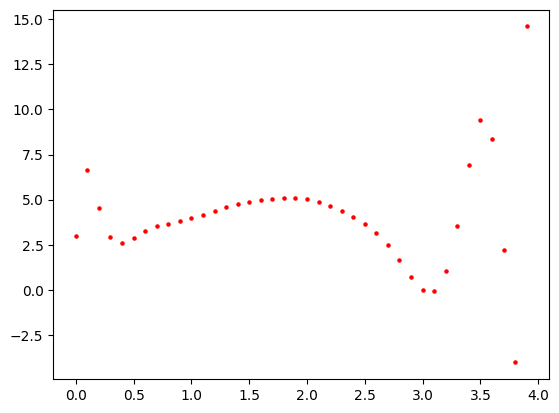

In [176]:
y_list_inter = [inter(f, x_list, x) for x in x_list_extended]
plt.scatter(x_list_extended, y_list_inter, s=5, c='r', zorder=2)

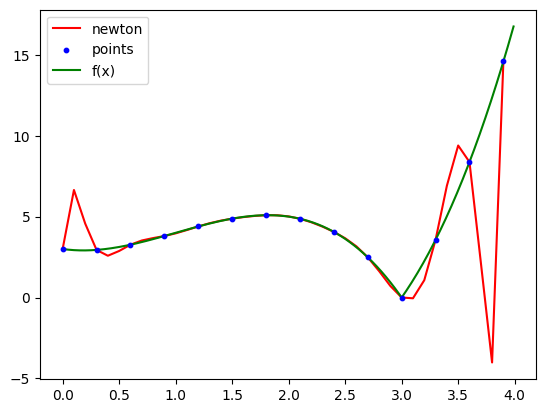

In [184]:
plt.plot(x_list_extended, y_list_inter, c='r', zorder=1, label='newton')
plt.scatter(x_list, y_list, s=10, c='b', zorder=3, label='points')
x_list_continious = np.arange(x_min, x_max, 0.01)
plt.plot(x_list_continious, f(x_list_continious), c='g', label='f(x)')
plt.legend(loc='best')

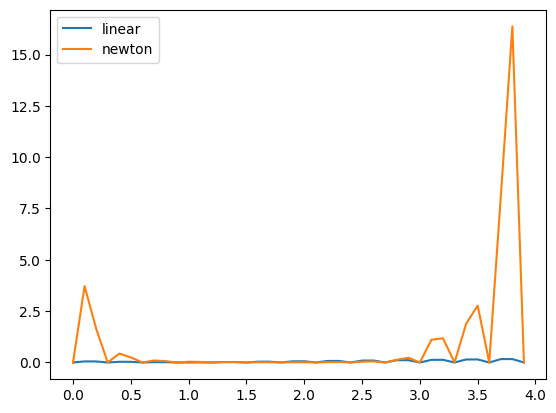

In [189]:
plt.plot(x_list_extended, np.abs(f(x_list_extended) - y_list_linear), label='linear')
plt.plot(x_list_extended, np.abs(f(x_list_extended) - y_list_inter), label='newton')
plt.legend(loc='best')